# **Programación II**
## **AA03 - Trabajo Práctico III**
### Proyecto de Machine Learning para regresión.

#### Link del codigo: https://colab.research.google.com/drive/1rZEymk3ktdfCiM-W7z14dXsNYIPUxKsJ?usp=sharing

## 1. Carga de Datos

In [58]:
import pandas as pd
data = pd.read_csv('vgsales.csv')

## 2. Exploracion de los datos

In [59]:
# Muestro las primeras fila de los dataset
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [60]:
# Verifico las características del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [61]:
# Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
data.shape

Cantidad de datos:


(16598, 11)

In [62]:
# Verifico la información de las columnas
print('Nombres columnas:')
data.columns

Nombres columnas:


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [63]:
# Chequeo el número de registros
len(data)

16598

<ipython-input-64-33f8c6d60035>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

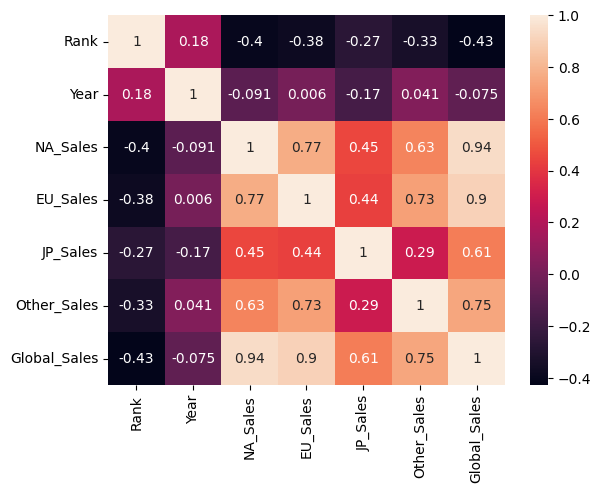

In [64]:
# Visualizamos la matriz de correlación
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot=True, yticklabels=corr.columns, xticklabels=corr.columns)

## 3. Limpieza de datos

In [65]:
# Verifico si hay valores duplicados
data.duplicated().any()

False

In [66]:
# Verifico valores nulos
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Hay valores nulos en las columnas "Year" y "Publisher".

In [67]:
# Elimino las filas que contienen valores nulos
data = data.dropna(subset=['Year'])

In [68]:
# Reemplazo los valores perdidos con un valor predeterminado, por ejemplo, "Desconocido"
data['Publisher'].fillna('Desconocido', inplace=True)

<ipython-input-68-4f4a9fe7c717>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Publisher'].fillna('Desconocido', inplace=True)


## 4. Visualizacion de datos

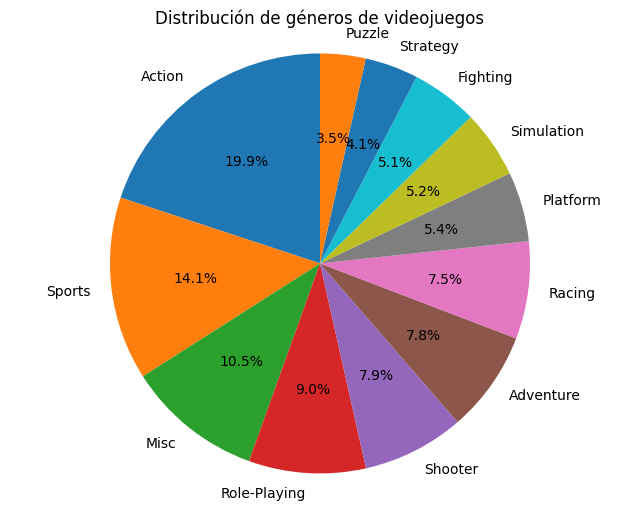

In [69]:
# Obtengo la cuenta de cada género
genre_counts = data['Genre'].value_counts()

# Gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución de géneros de videojuegos")
plt.axis('equal')
plt.show()


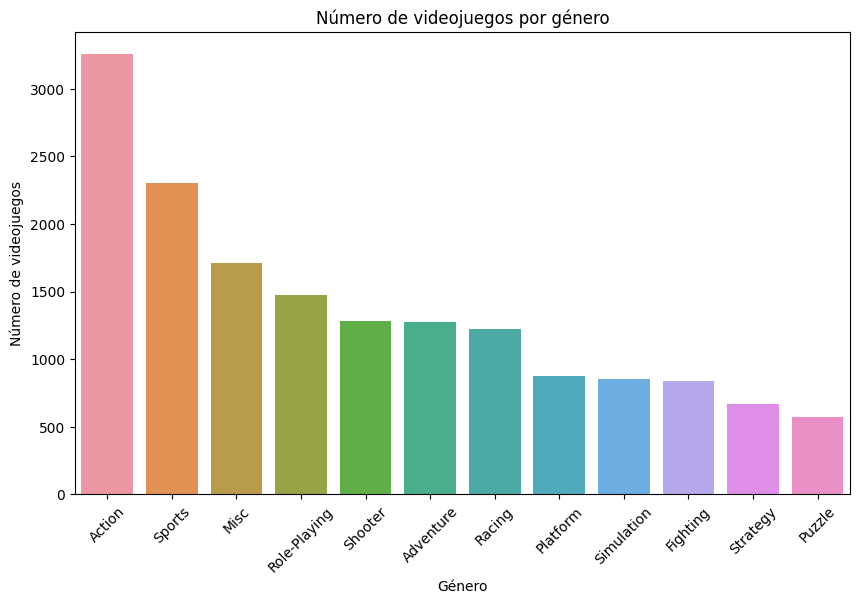

In [70]:
# Número de videojuegos por genero
genre_counts = data['Genre'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts)
plt.title('Número de videojuegos por género')
plt.xlabel('Género')
plt.ylabel('Número de videojuegos')
plt.xticks(rotation=45)
plt.show()


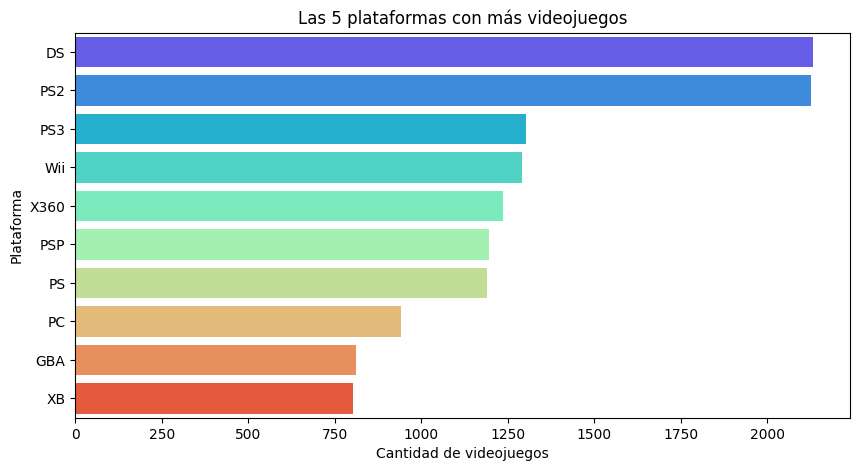

In [87]:
# Obtengo las 10 plataformas con más videojuegos
top_platforms = data['Platform'].value_counts().nlargest(10)

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='rainbow')

plt.xlabel('Cantidad de videojuegos')
plt.ylabel('Plataforma')
plt.title('Las 5 plataformas con más videojuegos')
plt.show()

## 5. Preparacion de datos

In [72]:
# Selección de caracteristica
selected_features = ['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = data[selected_features]
y = data['Global_Sales']

In [73]:
# Codificación de variables categóricas
X_encoded = pd.get_dummies(X, columns=['Platform', 'Genre'], drop_first=True)

### 5.1. División de datos

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


## 6. Entrenar y ajustar los modelos

### 6.1. Regresión Lineal

In [75]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

### 6.2. Árboles de Decisión

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

### 6.3. Bosques Aleatorios

In [77]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### 6.7. Predicciones

In [78]:
regression_predictions = regression.predict(X_test)
tree_predictions = tree.predict(X_test)
forest_predictions = forest.predict(X_test)

### 6.8. Evaluación de modelos

In [79]:
from sklearn.metrics import mean_squared_error, r2_score

regression_rmse = mean_squared_error(y_test, regression_predictions, squared=False)
regression_r2 = r2_score(y_test, regression_predictions)

tree_rmse = mean_squared_error(y_test, tree_predictions, squared=False)
tree_r2 = r2_score(y_test, tree_predictions)

forest_rmse = mean_squared_error(y_test, forest_predictions, squared=False)
forest_r2 = r2_score(y_test, forest_predictions)

print("Regresión Lineal - RMSE:", regression_rmse)
print("Regresión Lineal - R^2:", regression_r2)
print("Árboles de Decisión - RMSE:", tree_rmse)
print("Árboles de Decisión - R^2:", tree_r2)
print("Bosques Aleatorios - RMSE:", forest_rmse)
print("Bosques Aleatorios - R^2:", forest_r2)

Regresión Lineal - RMSE: 0.00521035328938682
Regresión Lineal - R^2: 0.999993645985556
Árboles de Decisión - RMSE: 0.7923223951575281
Árboles de Decisión - R^2: 0.8530675509961303
Bosques Aleatorios - RMSE: 0.8624877071319594
Bosques Aleatorios - R^2: 0.825891617048429


## 7. Conclusión


In [89]:
models = ['Regresión Lineal', 'Árboles de Decisión', 'Bosques Aleatorios']
rmse_values = [0.0052, 0.7923, 0.8625]
r2_values = [0.99999, 0.8531, 0.8259]


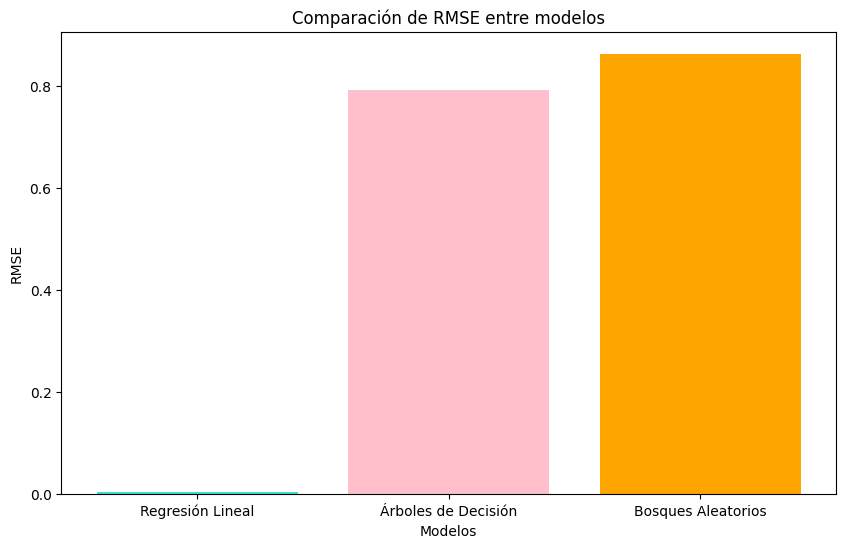

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['turquoise', 'pink', 'orange'])
plt.title('Comparación de RMSE entre modelos')
plt.xlabel('Modelos')
plt.ylabel('RMSE')
plt.show()

 El gráfico muestra la comparación de los valores de RMSE entre los modelos, donde se puede observar claramente que la regresión lineal tiene el valor más bajo, seguido por los árboles de decisión y los bosques aleatorios.

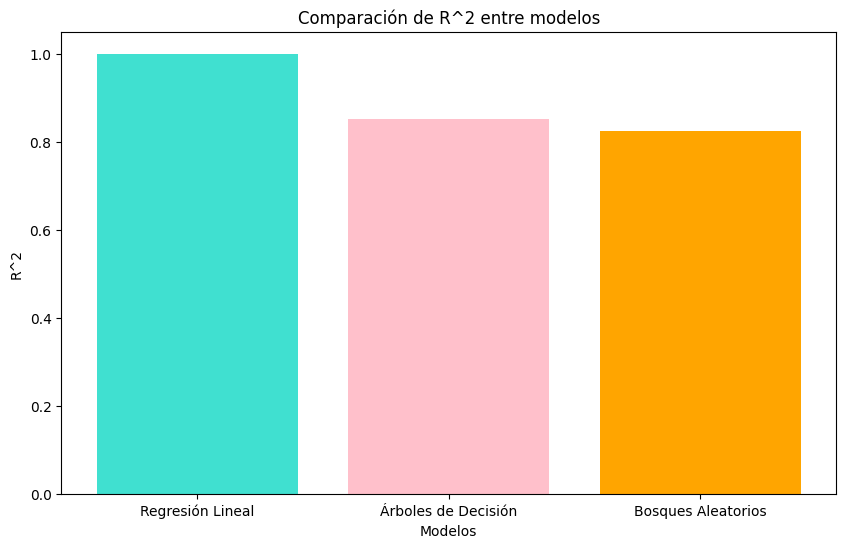

In [86]:
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['turquoise', 'pink', 'orange'])
plt.title('Comparación de R^2 entre modelos')
plt.xlabel('Modelos')
plt.ylabel('R^2')
plt.show()

El gráfico muestra la comparación de los valores de R^2 entre los modelos, donde nuevamente se puede ver que la regresión lineal tiene el valor más alto, indicando una mayor capacidad para explicar la varianza de la variable dependiente, seguida por los árboles de decisión y los bosques aleatorios.

En conclusión, el modelo de Regresión Lineal muestra el mejor rendimiento en términos de ajuste y capacidad de explicación de la varianza en este conjunto de datos de ventas de videojuegos. Los modelos de Árboles de Decisión y Bosques Aleatorios también ofrecen resultados aceptables.